# Домашняя работа 1


In [ ]:
from ogb.nodeproppred import NodePropPredDataset
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np



/home/nikita/proga/GNN/gnn1/lib/python3.12/site-packages/outdated/__init__.py:36: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version
/home/nikita/proga/GNN/gnn1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Загрузка данных

In [ ]:
dataset = NodePropPredDataset(name='ogbn-arxiv', root='data')
graph, labels = dataset[0]

print("Количество узлов:", graph["num_nodes"])
print("Количество рёбер:", graph["edge_index"].shape[1])


Количество узлов: 169343
Количество рёбер: 1166243


/home/nikita/proga/GNN/gnn1/lib/python3.12/site-packages/ogb/nodeproppred/dataset.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_dict = torch.load(pre_processed

In [ ]:
edge_index = graph["edge_index"].T  # np.array (1.1M × 2)
G = nx.DiGraph()
G.add_edges_from(edge_index)
G = G.to_undirected()

Визуализируйте граф на семпле из 1000 узлов

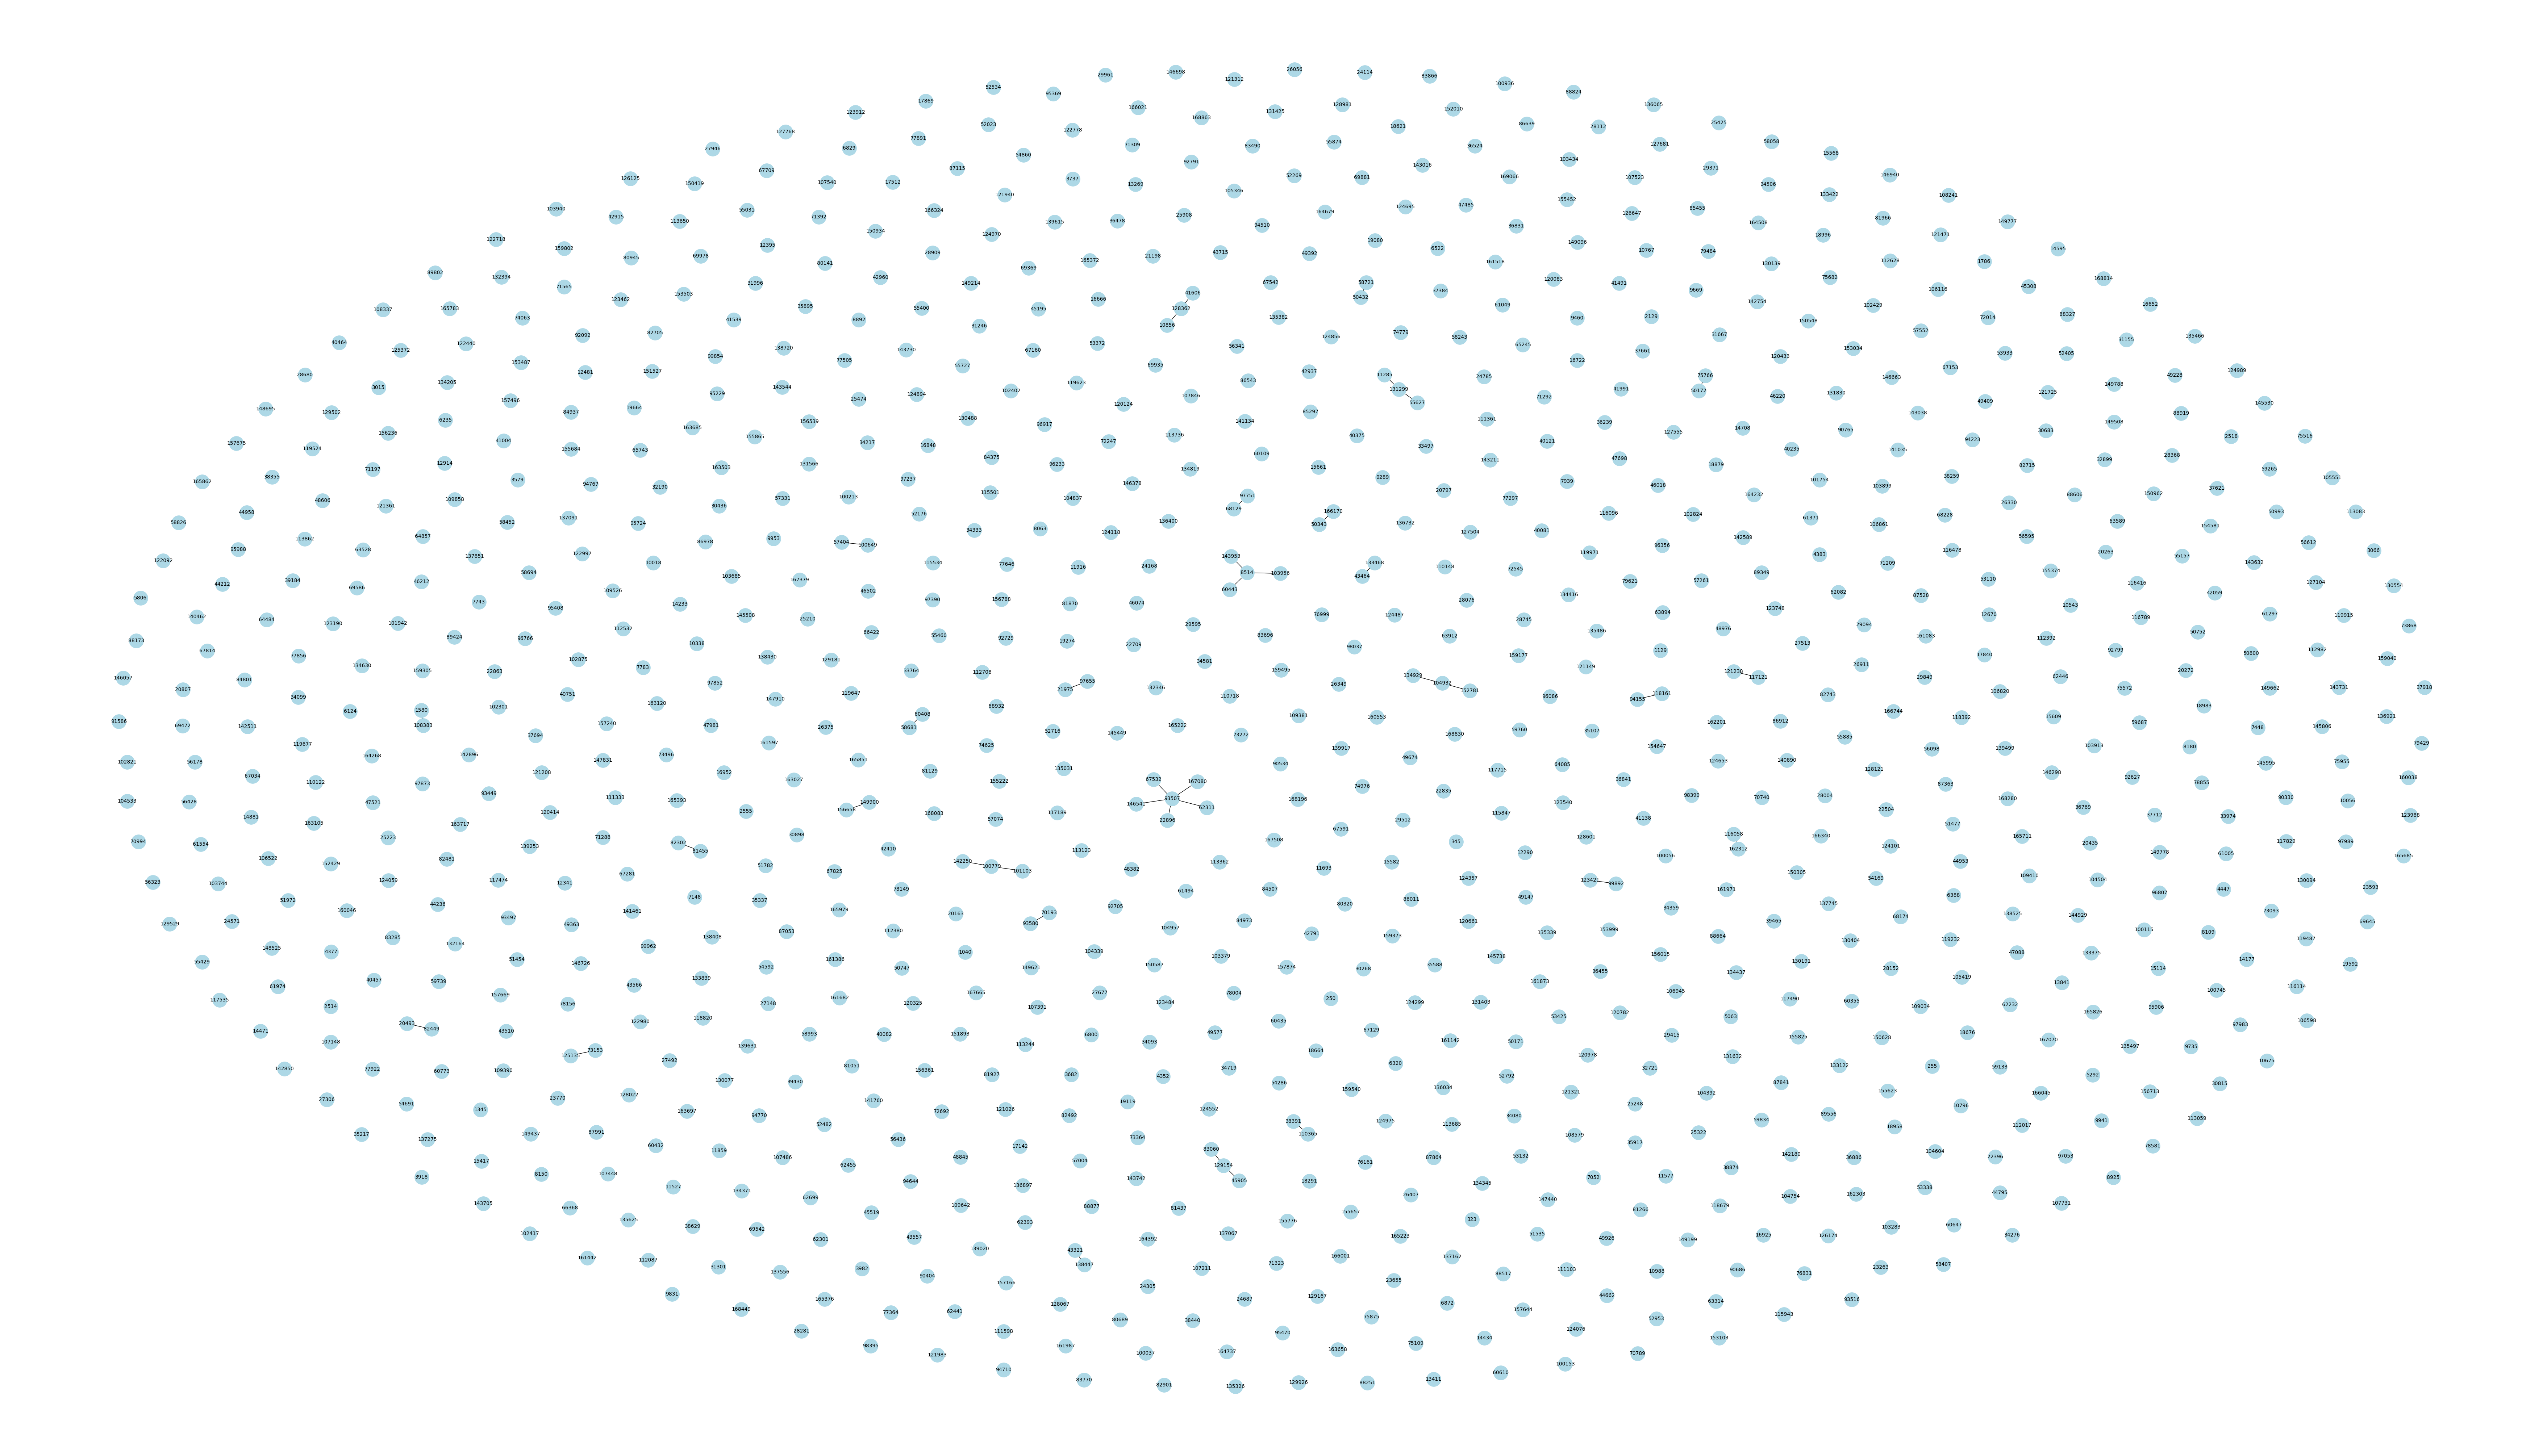

In [ ]:
np.random.seed(101)
sample_nodes = np.random.choice(G.nodes, size=1000)
G_ = G.subgraph(sample_nodes)

plt.figure(figsize=(70, 40))
nx.draw(G_, with_labels=True, node_color="lightblue", node_size=800, font_size=10)
plt.show()

### Предварительный анализ

In [ ]:
# Cropping the graph to 30'000 nodes 

sample_nodes = np.random.choice(G.nodes, size=10000)
G = G.subgraph(sample_nodes)

Произведем предварительный анализ графа

In [ ]:
# TODO: средняя степень
avg_degree = np.mean([G.degree(node) for node in G.nodes()]) # TODO

# TODO: плотность графа
density = nx.density(G)  # TODO

# TODO: радиус графа
# TODO: диаметер графа 
diameter = 0.
radius = 0.
for component in list(nx.connected_components(G)):
    diameter = max(diameter, nx.diameter(G.subgraph(component)))
    radius  = min(radius, nx.radius(G.subgraph(component)))

print(f"Средняя степень: {avg_degree:.2f}")
print(f"Плотность: {density:.6f}")
print(f"Диаметер графа: {diameter:.4f}")
print(f"Радиус графа: {radius:.4f}")

Средняя степень: 0.12
Плотность: 0.000119
Диаметер графа: 5.0000
Радиус графа: 0.0000


### Анализ на центральность

Найдите узел с максимальной центральностью

In [ ]:
# TODO: Вычисление центральности по степени (degree centrality)
degree_centrality = nx.centrality.
print("Центральность по степени:", degree_centrality)

# TODO: Вычисление центральности по близости (closeness centrality)
closeness_centrality = ...
print("Центральность по близости:", closeness_centrality)

# TODO: Вычисление центральности по междуузловой значимости (betweenness centrality)
betweenness_centrality = ...
print("Центральность по междуузловой значимости:", betweenness_centrality)


SyntaxError: invalid syntax (3792093295.py, line 2)

Анализ кластеров

In [ ]:
# TODO: Вычислите средний кластерный коэффициент графа
global_cluster_coeff = ...
print("Cредний кластерный коэффициент графа:", global_cluster_coeff)


In [ ]:
# TODO: Вычислите коэффициент транзитивности
transitivity_coeff = ...
print("Коэффициент транзитивности графа:", transitivity_coeff)


### Поиск сообществ

Реализуйте 2 метода поиска сообществ:
1. С помощью готовой реализации в библиотеке NetworkX
2. Реализуйте самостоятельно класс с алгоритмом Clauset–Newman–Moore

Сравните полученные результаты

Алгоритм Clauset–Newman–Moore (CNM)

---

**1. Начальное состояние**
- Каждая вершина — отдельное сообщество.  
- Вычисляем степени вершин и матрицу смежности.

---

**2. Вычисляем для всех пар сообществ** $(r, s)$, между которыми есть хотя бы одно ребро:

$$
\Delta Q_{rs} = 2 \, (e_{rs} - a_r a_s)
$$

где:  

- $e_{rs}$ — доля рёбер между сообществами *r* и *s*, делённая на $2m$;  
- $a_r = \sum_t e_{rt}$ — доля концов рёбер, инцидентных *r*.

---

**2.1. Доля концов рёбер, инцидентных вершинам из $r$**

Это часть всех концов рёбер в графе, которые принадлежат вершинам, входящим в сообщество $r$.

Эта величина обозначается как $a_r$ и вычисляется по формуле:

$$
a_r = \frac{1}{2m} \sum_{i \in r} k_i
$$

где:  

- $k_i$ — степень вершины $i$ (сколько у неё рёбер);  
- $m$ — общее число рёбер в графе;  
- $2m$ — общее количество **концов рёбер** (так как каждое ребро имеет два конца).

---

**3. Выбираем пару $(r, s)$** с максимальным $\Delta Q$ и объединяем их.

---

**4. Обновляем:**
- значения $e_{rt}, a_r$;  
- новую модульность:  
  $$
  Q \leftarrow Q + \Delta Q
  $$

---

**5. Повторяем**, пока $\Delta Q > 0$.

---

**6. Выбираем состояние с максимальным $Q$** как оптимальное разбиение.


Описание алгоритма - https://arxiv.org/pdf/cond-mat/0408187

In [ ]:
class CNM:
    """
    Алгоритм Clauset–Newman–Moore для обнаружения сообществ.
    TODO: Заполните пропущенные участки кода.
    """

    def __init__(self, edges):
        self.graph = defaultdict(dict)
        for u, v, w in edges:
            if u == v: continue
            self.graph[u][v] = self.graph[u].get(v, 0) + w
            self.graph[v][u] = self.graph[v].get(u, 0) + w
        self.nodes = list(self.graph.keys())
        self.m = sum(sum(self.graph[u].values()) for u in self.nodes) / 2
        self.deg = {u: sum(self.graph[u].values()) for u in self.nodes}

    def fit(self, verbose=False):
        communities = {u: {u} for u in self.nodes}
        comm_id = {u: u for u in self.nodes}
        m2 = 2 * self.m
        a = {u: self.deg[u] / m2 for u in self.nodes}

        # TODO 0: Доля рёбер между сообществами

        # Начальная модульность
        Q = -sum(a[c] ** 2 for c in a)

        # Основной цикл
        while True:
            best_dQ = 0
            best_pair = None

            # TODO 1: Найти пару (r, s) с максимальным ΔQ

            # TODO 2: Условие выхода
            if ...:  # TODO
                break

            r, s = best_pair
            if verbose:
                print(f"Объединяем {r}, {s} с ΔQ={best_dQ:.6f}")

            # TODO 3: Объединение сообществ
            pass  # TODO

            # TODO 4: Обновление a, e, Q
            pass  # TODO

        final_comms = [c for c in communities.values() if c]
        return final_comms, Q


In [ ]:
model = CNM(edges)
comms, Q_my = model.fit(verbose=True)

# NetworkX эталон
nx_comms = list(greedy_modularity_communities(G))
Q_nx = modularity(G, nx_comms)

print("\n=== Сравнение ===")
print("CNM (наш)  Q =", round(Q_my, 5))
print("NetworkX    Q =", round(Q_nx, 5))
print("Количество сообществ:", len(comms))


Визуализация результатов

In [ ]:
plt.figure(figsize=(20, 10))
sub_nodes = list(G.nodes)[:1000]
H = G.subgraph(sub_nodes)

# создаём отображение: node -> community_id
node2comm = {}
for i, comm in enumerate(nx_comms):
    for n in comm:
        node2comm[n] = i

colors = [node2comm.get(n, 0) for n in H.nodes()]
nx.draw(H, node_color=colors, node_size=40, edge_color="gray", with_labels=False, cmap="tab10")
plt.title("Гграф окрашен по сообществам CNM")
plt.show()